In [387]:
letter="a"
band=1

import numpy as np
%config InlineBackend.rc = {}
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from astropy.utils.data import download_file
from astropy.io import fits
from matplotlib.colors import LogNorm
from photutils import CircularAperture
from astropy import units as u
from photutils import aperture_photometry
from photutils import CircularAnnulus
from photutils import EllipticalAnnulus
from math import sin, cos, pi
from photutils import EllipticalAperture

bandCorrectionFactor=[1.9350E-6,2.7048E-6,1.8326e-6,5.2269E-5]                    #Checked

bandFrequency=[2.99792e8/3.4e-6,2.99792e8/4.6e-6,2.99792e8/12e-6,2.99792e8/22e-6] #Checked
if band == 1:
    ChosenBandCorrectionFactor=bandCorrectionFactor[0]*bandFrequency[0]
elif band == 2:
    ChosenBandCorrectionFactor=bandCorrectionFactor[1]*bandFrequency[1]
elif band == 3:
    ChosenBandCorrectionFactor=bandCorrectionFactor[2]*bandFrequency[2]
elif band ==4: 
    ChosenBandCorrectionFactor=bandCorrectionFactor[3]*bandFrequency[3]
    
cycle=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
GalAPetRad=[9.6,3.2,9.5,8.8,12.5,7.0,10.5,14.3,18.2,29.5,56.4,56.3,12,16.2,22.5,9.5,14.5]
GalAInc=[47,28,35,43,26,55,49,68,50,68,60,67,46,65,58,35,60] #Checked
GalAPA=[65,135,0,60,90,100,60,30,5,60,150,85,35,60,120,30,140]    #Checked
GalAPixCentreXVal=[221,220,219,216,215,227,219,225,219, 219,202,219,223,220,218,218,217]
GalAPixCentreYVal=[209,219,219,226,235,226,220,212,219, 219,219,219,223,219,219,221,217]
GalAMajAxis=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
GalAMinAxis=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
GalBPetRad=[6.5,11,7.7,6.5,11.3,9.2,8.6,10.3,14.3,103,103,103,2.5,10.3,8.9,18.0,6.2]
GalBInc=[50,41,17,50,25,57,34,58,41,79,79,79,0,58,23,50,45]
GalBPA=[0,30,0,0,0,150,80,145,40,55,55,55,25,145,140,45,135]     #Checked
GalBPixCentreXVal=[219,229,219,219,228,219,223,219,219,219,219,219,220,219,219,219,236]
GalBPixCentreYVal=[219,219,219,219,208,219,211,219,219,219,219,219,220,219,219,219,227]
GalBMajAxis=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
GalBMinAxis=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in cycle:
    GalAMajAxis[i-1]=(2*GalAPetRad[i-1])/1.375
    GalAMinAxis[i-1]=GalAMajAxis[i-1]*(cos((((GalAInc[i-1])*np.pi)/180)))
    GalBMajAxis[i-1]=(2*GalBPetRad[i-1])/1.375
    GalBMinAxis[i-1]=GalBMajAxis[i-1]*(cos((((GalBInc[i-1])*np.pi)/180)))
    
#print(GalAMajAxis)
#print(GalAMinAxis)

image_dataMin = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]  #Stores Mimimum Flux Value
image_dataPix = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]  #Stores number of pixels in each picture
image_dataAve = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]  #Stores average values of pixels in picture
image_dataMinAp = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]  #Stores Mimimum Flux Value in aperture
image_dataPixAp = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]  #Stores number of pixels in each aperture
image_dataAveAp = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]  #Stores average values of pixels in aperture
arrmgePic =     [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
photsum = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]
tot_table=[0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0 ,0]

#Finding background locally

Backgroundlevels=[]

for i in arrmgePic:
    image_file = '/mnt/lb576-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/WISE/%d%c/%d%c/%d%c/%d%cW%iPic.fits' % (i, letter, i, letter, i, letter, i, letter, band)
    hdu_list = fits.open(image_file)
    image_data = hdu_list[0].data
    hdu_list.close()
    image_dataMin[i-1]=np.min(image_data)
    #print(np.min(image_data))
    pixels = image_data.shape[0]*image_data.shape[1]
    image_dataPix[i-1]=pixels
    flat_image = list(image_data.flat)
    total = 0
    for l in range(pixels):
        total = total + flat_image[l]
    Ave=total/pixels
    b=1
    
    if letter == 'a':
        
        ratioA=GalAMajAxis[i-1]/GalAMinAxis[i-1]
        #print("increment of major axis is:", ratioA)
        toprangeA=GalAMajAxis[i-1]+(2*ratioA)
        #print("Stop before major axis is:",  toprangeA)
        #print("Stop before minor is:", GalAMinAxis[i-1]+2)
        
        rad=ratioA
               
        while rad < toprangeA:
            position = [(GalAPixCentreXVal[i-1],GalAPixCentreYVal[i-1])]
            annulus_apertures = EllipticalAnnulus(position, a_in=rad-ratioA, a_out=rad, b_out=b, theta=((GalAPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
            image_dataAve[i-1] =Ave*ChosenBandCorrectionFactor
            data = image_data
            phot_table = aperture_photometry(data, annulus_apertures, method='subpixel', subpixels=10)
            annulus_area=annulus_apertures.area()
            photsum[i-1] = phot_table
            rad=rad+ratioA
            b=b+1
            if rad > toprangeA:
                annulus_apertures = EllipticalAnnulus(position, a_in=rad-ratioA, a_out=rad, b_out=b, theta=((GalAPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
                data = image_data
                phot_table = aperture_photometry(data, annulus_apertures, method='subpixel', subpixels=10)
                annulus_area=annulus_apertures.area()
                Backgroundlevels.append(((phot_table[0][0])/annulus_area))
    
    else:
        
        ratioB=GalBMajAxis[i-1]/GalBMinAxis[i-1]
        #print("increment of major axis is:", ratioB)
        toprangeB=GalBMajAxis[i-1]+(2*ratioB)
        #print("Stop before major axis is:",  toprangeB)
        #print("Stop before minor is:", GalBMinAxis[i-1]+2)
        
        rad=ratioB
        
        while rad < toprangeB:
            position = [(GalBPixCentreXVal[i-1],GalBPixCentreYVal[i-1])]
            annulus_apertures = EllipticalAnnulus(position, a_in=rad-ratioB, a_out=rad, b_out=b, theta=((GalBPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
            image_dataAve[i-1]=Ave*ChosenBandCorrectionFactor
            data = image_data
            phot_table = aperture_photometry(data, annulus_apertures, method='subpixel', subpixels=10)
            annulus_area=annulus_apertures.area()
            photsum[i-1] = phot_table
            rad=rad+ratioB
            b=b+1
            if rad > toprangeB:
                annulus_apertures = EllipticalAnnulus(position, a_in=rad-ratioB, a_out=rad, b_out=b, theta=((GalBPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
                data = image_data
                phot_table = aperture_photometry(data, annulus_apertures, method='subpixel', subpixels=10)
                annulus_area=annulus_apertures.area()
                Backgroundlevels.append(((phot_table[0][0])/annulus_area))

                
#Backgroundlevels=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]                
print(image_dataMin)
print(Backgroundlevels)
#for i in range(17):
 #   print(Backgroundlevels[i]-image_dataMin[i])
print(Backgroundlevels[12])

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_sin

[2.9606998, 2.9533341, 2.8027847, 2.8625162, 3.2970734, 3.1521001, 3.0116687, 2.9946039, 3.8052111, 3.3703508, 3.4419746, 3.2951798, 3.3114014, 3.1149378, 2.7047749, 3.468467, 3.5085287]
[3.6750790972207641, 10.297351106773032, 4.4899203726332413, 3.4023687459037086, 3.7463234895931934, 5.044625871148356, 4.0434331654750642, 3.4868188864148384, 5.5131138077558921, 6.7152238015673307, 4.282500018234221, 4.9113247142341718, 3.6469368172580716, 3.5536455311567616, 7.3459169838065419, 7.9045476833439343, 4.2355319748599856]
3.64693681726


Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division
Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


In [388]:
TopVal=30
bot=11
top=bot+1

Exception ignored in: 'photutils.geometry.elliptical_overlap.elliptical_overlap_single_subpixel'
ZeroDivisionError: float division


This is galaxy: 11


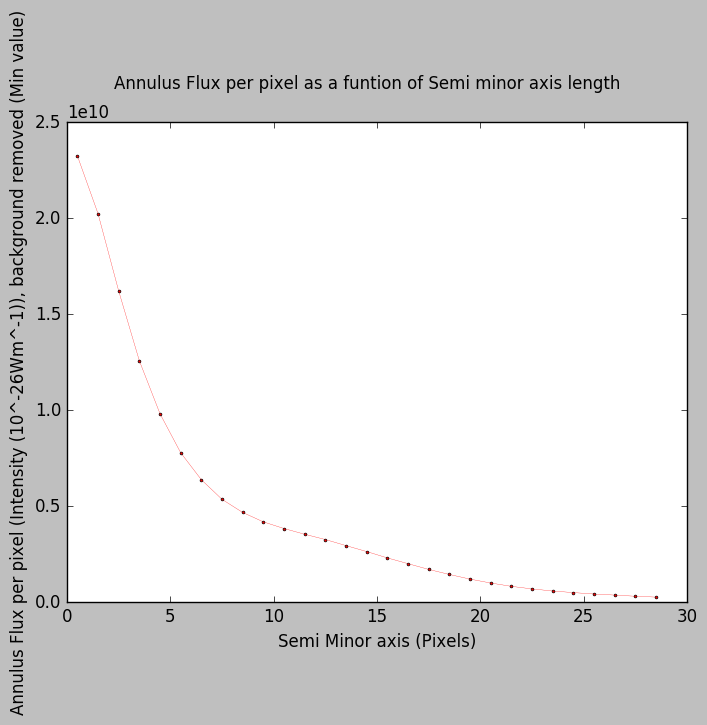

This is galaxy: 11


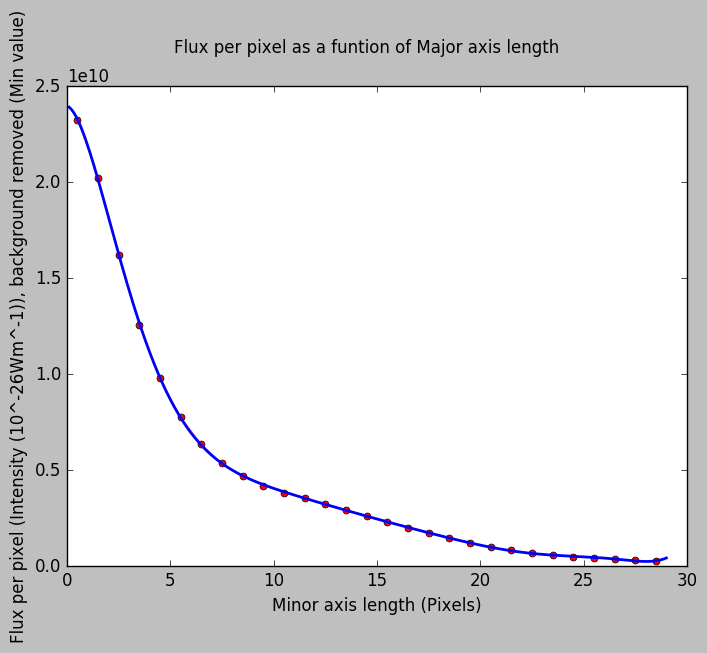

In [389]:
for i in range(bot,top): #arrmgePic:
    image_file = '/mnt/lb576-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/WISE/%d%c/%d%c/%d%c/%d%cW%iPic.fits' % (i, letter, i, letter, i, letter, i, letter, band)
    hdu_list = fits.open(image_file)
    image_data = hdu_list[0].data
    hdu_list.close()
    image_dataMin[i-1]=np.min(image_data)
    pixels = image_data.shape[0]*image_data.shape[1]
    image_dataPix[i-1]=pixels
    flat_image = list(image_data.flat)
    total = 0
    for l in range(pixels):
        total = total + flat_image[l]
    Ave=total/pixels

   
    RadArray=[]
        
    AnnulusFlux=[]
    DeltaFluxAtRad=[]
    
    b=1
    
    if letter == 'a':
        ratioA=GalAMajAxis[i-1]/GalAMinAxis[i-1]
        toprangeA=GalAMajAxis[i-1]+ratioA
        rad=ratioA
        while b < TopVal:
            position = [(GalAPixCentreXVal[i-1],GalAPixCentreYVal[i-1])] #Aperture centre around the image centre
            annulus_apertures = EllipticalAnnulus(position, a_in=rad-ratioA, a_out=rad, b_out=b, theta=((GalAPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
            data = image_data
            phot_table = aperture_photometry(data, annulus_apertures, method='subpixel', subpixels=10)
            annulus_area=annulus_apertures.area()
            photsum[i-1] = phot_table
            AnnulusFlux.append((((phot_table[0][0])-(Backgroundlevels[i-1]*annulus_area))*ChosenBandCorrectionFactor)/annulus_area)
            RadArray.append(b-.5)
            rad=rad+ratioA
            b=b+1
    else:
        ratioB=GalBMajAxis[i-1]/GalBMinAxis[i-1]
        toprangeB=GalBMajAxis[i-1]+ratioB
        rad=ratioB
        while b < TopVal:
            position = [(GalBPixCentreXVal[i-1],GalBPixCentreYVal[i-1])] #Aperture centre around the image centre
            annulus_apertures = EllipticalAnnulus(position, a_in=rad-ratioB, a_out=rad, b_out=b, theta=((GalBPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
            image_dataAve[i-1]=Ave*ChosenBandCorrectionFactor
            data = image_data
            phot_table = aperture_photometry(data, annulus_apertures, method='subpixel', subpixels=10)
            annulus_area=annulus_apertures.area()
            photsum[i-1] = phot_table
            AnnulusFlux.append((((phot_table[0][0])-(Backgroundlevels[i-1]*annulus_area))*ChosenBandCorrectionFactor)/annulus_area)
            RadArray.append(b-.5)
            rad=rad+ratioB
            b=b+1
    print("This is galaxy:", bot)
    plt.figure(1)
    y1 = AnnulusFlux
    x= RadArray
    #plt.errorbar(x, y5A, xerr=(0.5, 0.7, 5.2, 3), ecolor='black', capthick=1.0, lw=1)
    line = plt.plot(x, y1, 'ro-', linewidth=0.2, ms=2)
    plt.suptitle("Annulus Flux per pixel as a funtion of Semi minor axis length")
    plt.xlabel('Semi Minor axis (Pixels)')
    plt.ylabel('Annulus Flux per pixel (Intensity (10^-26Wm^-1)), background removed (Min value)')
    #labels = ['', '','','','5', '', '', '','','10','', '','','','15', '', '', '','','20','', '','','','25', '', '', '','','30','', '','','','35', '', '', '','','40','', '','','','45', '', '', '','','50','', '','','','55', '', '', '','','60','', '','','','65', '', '', '','','70','', '','','','75', '', '', '','','80','', '','','','85','','','','','90','', '','','','95', '', '', '','','100']
    #plt.xticks(x, labels, rotation='vertical')

    plt.show()
    print("This is galaxy:", bot)

    fit=0
    fit=np.polyfit(RadArray, AnnulusFlux, 9)
    #print((fit))
    effrad=0
    ans=10
    x=[]
    y=[]
    div=10
    increment=1/div
    while effrad < TopVal-1:
        effrad=effrad+increment
            #ans = ((fit[0]*(effrad**6))+(fit[1]*(effrad**5))+(fit[2]*(effrad**4))+(fit[3]*(effrad**3))+(fit[4]*(effrad**2))+(fit[5]*(effrad**1))+(fit[6]))#
        ans = ((fit[0]*(effrad**9))+(fit[1]*(effrad**8))+(fit[2]*(effrad**7))+(fit[3]*(effrad**6))+(fit[4]*(effrad**5))+(fit[5]*(effrad**4))+(fit[6]*(effrad**3))+(fit[7]*(effrad**2))+(fit[8]*(effrad**1))+(fit[9]))
        #ans = ((fit[0]*(effrad**12))+(fit[1]*(effrad**11))+(fit[2]*(effrad**10))+(fit[3]*(effrad**9))+(fit[4]*(effrad**8))+(fit[5]*(effrad**7))+(fit[6]*(effrad**6))+(fit[7]*(effrad**5))+(fit[8]*(effrad**4))+(fit[9]*(effrad**3))+(fit[10]*(effrad**2))+(fit[11]*(effrad**1))+(fit[12]))
        x.append(effrad)
        y.append(round(ans,1))
        
        #print("effrad is", effrad)
    #print("x is:", x)
    #print("y is:", y)
    roundy=[]
    roundx=[]
    for i in range(div*(TopVal-1)):
        roundy.append(int(y[i]))
        roundx.append(round(x[i],4))
    #print()
    #print()
    #print("roundx is:", roundx)
    #print("roundy is:", roundy)
plt.figure(1)
y1 = AnnulusFlux
x1 = RadArray
line = plt.plot(x1, y1, 'ro-', linewidth=0.2, ms=5)
y = roundy
x = roundx
line = plt.plot(x, y, 'bo-', linewidth=2, ms=0.05)
plt.suptitle('Flux per pixel as a funtion of Major axis length')
plt.xlabel('Minor axis length (Pixels)')
plt.ylabel('Flux per pixel (Intensity (10^-26Wm^-1)), background removed (Min value)')
labels=RadArray
plt.show()

#print(x)
#print(y)
#LOBF is the roundx and roundy names.

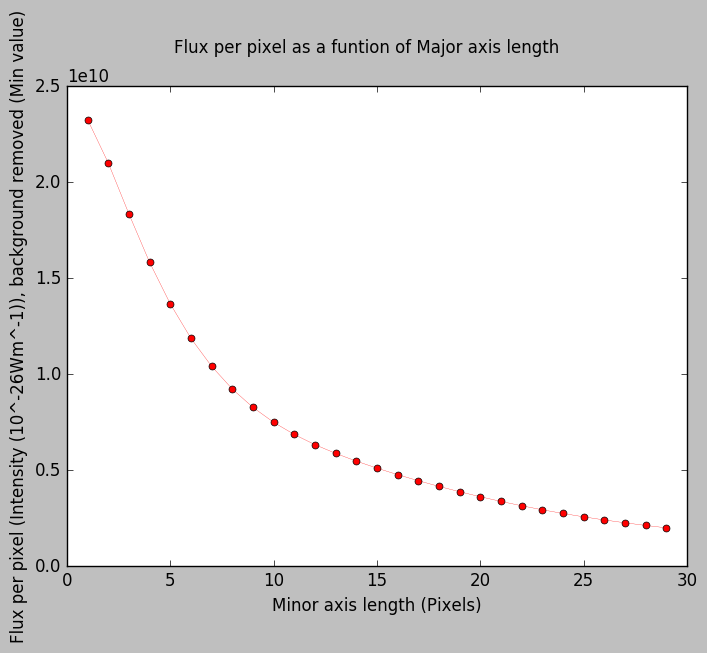

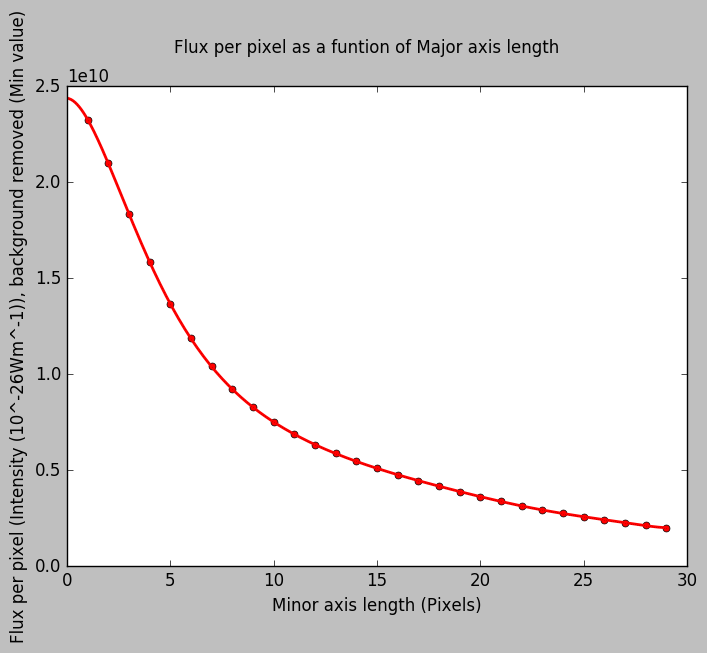

In [390]:
FluxPerPixelArray=[]
EffRadArray=[]
for i in range(bot,top):   #arrmgePic:
    image_file = '/mnt/lb576-XDrive/Physics/Projects/MPhys Projects/2016-17/Gas Dust Galaxies/All Data/WISE/%d%c/%d%c/%d%c/%d%cW%iPic.fits' % (i, letter, i, letter, i, letter, i, letter, band)
    hdu_list = fits.open(image_file)
    image_data = hdu_list[0].data
    hdu_list.close()
    image_dataMin[i-1]=np.min(image_data)
    pixels = image_data.shape[0]*image_data.shape[1]
    image_dataPix[i-1]=pixels
    flat_image = list(image_data.flat)
    total = 0
    for l in range(pixels):
        total = total + flat_image[l]
    Ave=total/pixels
    TotRadArray=[]
    TotFluxAtRad=[]
    b=1
    if letter == 'a':
        ratioA=GalAMajAxis[i-1]/GalAMinAxis[i-1]
        toprangeA=GalAMajAxis[i-1]+ratioA
        rad=ratioA
        while b < TopVal: ##########Needs to be changed back
            position = [(GalAPixCentreXVal[i-1],GalAPixCentreYVal[i-1])] #Aperture centre around the image centre
            apertures = EllipticalAperture(position, a=rad, b=b, theta=((GalAPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
            data = image_data
            phot_table = aperture_photometry(data, apertures, method='subpixel', subpixels=10)
            photsum[i-1] = phot_table
            a=apertures.area()
            TotFluxAtRad.append((((phot_table[0][0]-((apertures.area())*Backgroundlevels[i-1]))*ChosenBandCorrectionFactor))/a)   #Subtracts the background level
            TotRadArray.append(b)
            rad=rad+ratioA
            b=b+1
    else:
        ratioB=GalBMajAxis[i-1]/GalBMinAxis[i-1]
        toprangeB=GalBMajAxis[i-1]+ratioB
        rad=ratioB
        while b < TopVal:
            position = [(GalBPixCentreXVal[i-1],GalBPixCentreYVal[i-1])] #Aperture centre around the image centre
            apertures = EllipticalAperture(position, a=rad, b=b, theta=((GalBPA[i-1])*(np.pi/180)))                   #Aperture at the position chosen
            data = image_data
            phot_table = aperture_photometry(data, apertures, method='subpixel', subpixels=10)
            photsum[i-1] = phot_table
            a=apertures.area()
            TotFluxAtRad.append((((phot_table[0][0]-((apertures.area())*Backgroundlevels[i-1]))*ChosenBandCorrectionFactor))/a)   #Subtracts the background level
            TotRadArray.append(b)
            rad=rad+ratioB
            b=b+1
    
    #print(TotFluxAtRad)
    #print(TotRadArray)
    
    plt.figure(1)
    y2 = TotFluxAtRad
    x2 = TotRadArray
    line = plt.plot(x2, y2, 'ro-', linewidth=0.2, ms=5)
    plt.suptitle('Flux per pixel as a funtion of Major axis length')
    plt.xlabel('Minor axis length (Pixels)')
    plt.ylabel('Flux per pixel (Intensity (10^-26Wm^-1)), background removed (Min value)')
    labels=RadArray
    plt.show()
    
    fit1=0     
    fit1=np.polyfit(TotRadArray, TotFluxAtRad, 9)
    
    effrad=0
    ans=10
    x1=[]
    y1=[]
    
    while effrad < TopVal-1:
        effrad=effrad+increment
            #ans = ((fit[0]*(effrad**6))+(fit[1]*(effrad**5))+(fit[2]*(effrad**4))+(fit[3]*(effrad**3))+(fit[4]*(effrad**2))+(fit[5]*(effrad**1))+(fit[6]))#
        ans = ((fit1[0]*(effrad**9))+(fit1[1]*(effrad**8))+(fit1[2]*(effrad**7))+(fit1[3]*(effrad**6))+(fit1[4]*(effrad**5))+(fit1[5]*(effrad**4))+(fit1[6]*(effrad**3))+(fit1[7]*(effrad**2))+(fit1[8]*(effrad**1))+(fit1[9]))
        #ans = ((fit1[0]*(effrad**12))+(fit1[1]*(effrad**11))+(fit1[2]*(effrad**10))+(fit1[3]*(effrad**9))+(fit1[4]*(effrad**8))+(fit1[5]*(effrad**7))+(fit1[6]*(effrad**6))+(fit1[7]*(effrad**5))+(fit1[8]*(effrad**4))+(fit1[9]*(effrad**3))+(fit1[10]*(effrad**2))+(fit1[11]*(effrad**1))+(fit1[12]))
        x1.append(effrad)
        y1.append(round(ans,1))
        #print("effrad is", effrad)
    #print("x is:", x)
    #print("y is:", y)
    roundy2=[]
    roundx2=[]
    for i in range(div*(TopVal-1)):
        roundy2.append(int(y1[i]))
        roundx2.append(round(x1[i],4))
    #print()
    #print()
    #print("roundx is:", roundx2)
    #print("roundy is:", roundy2)
plt.figure(1)
y2 = TotFluxAtRad
x2 = TotRadArray
line = plt.plot(x2, y2, 'ro-', linewidth=0.2, ms=5)
y = roundy2
x = roundx2
line = plt.plot(x, y, 'ro-', linewidth=2, ms=0.05)
plt.suptitle('Flux per pixel as a funtion of Major axis length')
plt.xlabel('Minor axis length (Pixels)')
plt.ylabel('Flux per pixel (Intensity (10^-26Wm^-1)), background removed (Min value)')
labels=RadArray
plt.show()  

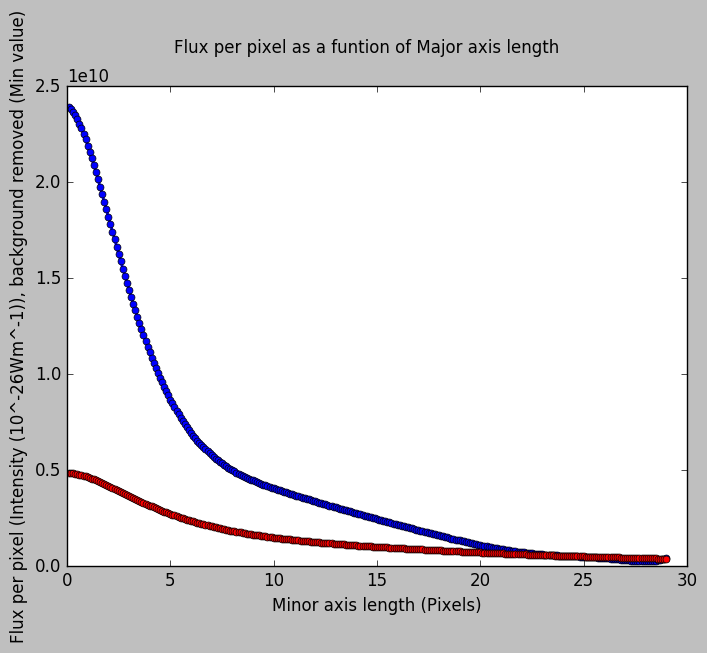

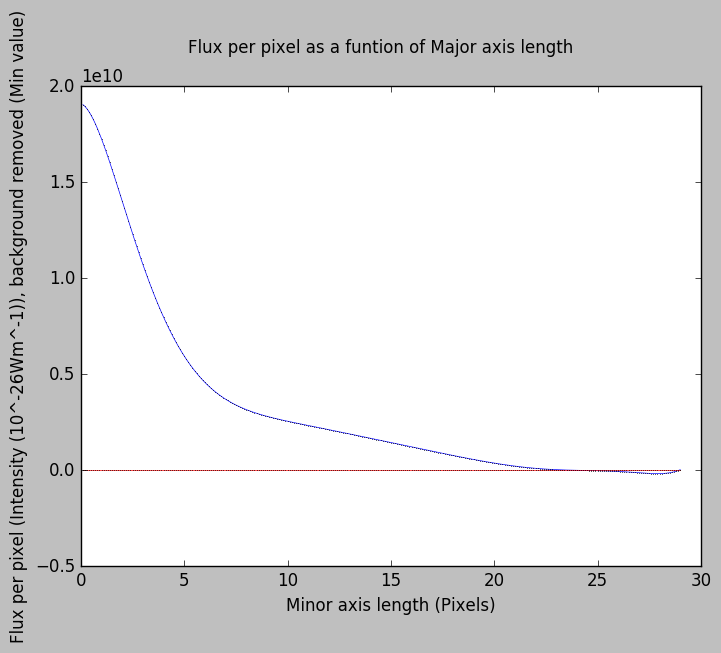

In [391]:
#print(len(roundx))
#print(len(roundy))
#print(len(roundx2))
#print(len(roundy2))
length=len(roundx)

for i in range(length):
    roundy2[i]=(0.2*roundy2[i])


plt.figure(1)
y2 = roundy
x2 = roundx
line = plt.plot(x2, y2, 'bo-', linewidth=2, ms=5)
y = roundy2
x = roundx2
line = plt.plot(x, y, 'ro-', linewidth=2, ms=5)
plt.suptitle('Flux per pixel as a funtion of Major axis length')
plt.xlabel('Minor axis length (Pixels)')
plt.ylabel('Flux per pixel (Intensity (10^-26Wm^-1)), background removed (Min value)')
labels=RadArray
plt.show()

difference=[]
y1=[]
for i in range(length):
    
    diff=(roundy[i]-(roundy2[i]))
    difference.append(diff)
    #print(diff)
    y1.append(0)

plt.figure(1)
y = difference
x = roundx
line = plt.plot(x, y, 'bo-', linewidth=0.5, ms=0.2)
y1=y1
x1=roundx
line = plt.plot(x1, y1, 'ro-', linewidth=0.5, ms=0.2)
plt.suptitle('Flux per pixel as a funtion of Major axis length')
plt.xlabel('Minor axis length (Pixels)')
plt.ylabel('Flux per pixel (Intensity (10^-26Wm^-1)), background removed (Min value)')
labels=RadArray
plt.show()


In [392]:
#print(difference)

#print()
for i in range(length):
    if abs(difference[i])<0.005e9:
        print(difference[i], i)

for i in range(length):
    if abs(difference[i])<0.05e9:
        if difference[i]<0:
            print("found pet rad is:",roundx[i-2], "+-0.1 pixels")
            break
            
store=roundx[i-1]
print(store)

4008513.1999999285 239
1917568.3999999762 240
-67889.60000002384 241
-1980113.3999999762 242
-3852067.4000000358 243
found pet rad is: 24.0 +-0.1 pixels
24.1


In [393]:
GalAInc=[47,28,35,43,26,55,49,68,50,68,60,67,46,65,58,35,60] #Checked
GalBInc=[50,41,17,50,25,57,34,58,41,79,79,79,49,58,23,50,45]

gal=0
ran=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
if letter == "a":
    for i in ran:
        gal=  round( ((1.375*store/(cos((((GalAInc[bot-1])*np.pi)/180)))) ),1)
else:
    for i in ran:
        gal=  round( ((1.375*store/(cos((((GalBInc[bot-1])*np.pi)/180)))) ),1)
        
    
print("Galaxy pet rad in arc seconds:" , gal)


#for i in ran:
#    print(gal[i-1]-Gal[i-1])
polynomial=[9,0,9,9,9,9,9,9,9,9,12,12,9,9,9,9,9]

Galaxy pet rad in arc seconds: 66.3


In [394]:
aconstantsizefriday=[12.9,5.6,12.3,12.8,11.9,13.2,16.8,20.6,24.4,49.6,66.3,69.3,14.3,17.6,31.1,13.1,25.6]
bconstantsizefriday=[11.6,12.4,12.1,11.6,14.1,16.4,15.4,17.4,19.3,157.1,157.1,157.1,4.8,17.4,14.3,24.0,12.4]


10.5

10.5

In [395]:


for i in range(17):
    print(2*GalAPetRad[i]-aconstantsizefriday[i])

    
print()    
    
for i in range(17):   
    print(2*GalBPetRad[i]-bconstantsizefriday[i])

6.299999999999999
0.8000000000000007
6.699999999999999
4.800000000000001
13.1
0.8000000000000007
4.199999999999999
8.0
12.0
9.399999999999999
46.5
43.3
9.7
14.799999999999997
13.899999999999999
5.9
3.3999999999999986

1.4000000000000004
9.6
3.3000000000000007
1.4000000000000004
8.500000000000002
2.0
1.799999999999999
3.200000000000003
9.3
48.900000000000006
48.900000000000006
48.900000000000006
0.20000000000000018
3.200000000000003
3.5
12.0
0.0


In [ ]:
aconstantsize=[12.9,5.5,12.3,12.8,11.9,13.2,16.8,20.6,24.4,49.6,70.7,69.3,14.3,17.6,31.1,13.1,25.6]
bconstantsize=[10.3,12.2,11.9,10.3,14.0,16.2,15.3,17.1,19.1,156.4,156.4,156.4,4.8,17.1,14.2,23.7,12.3]